# __`Day_13 Study About Boosting_Algorithm`__

## **Boosting_Algorithm**
Boosting is an ensemble learning technique that combines `multiple weak models sequentially`.

focusing on training instances that previous  , to create a strong predictive model with improved accuracy.







In [34]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [35]:
# import the data
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [36]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      1
table      1
price      1
x          1
y          1
z          1
dtype: int64

In [37]:
# Fill The Missing value with median 
df['depth'] = df['depth'].fillna(df['depth'].median() , inplace=True)
df['table'] = df['table'].fillna(df['table'].median() , inplace=True)
df['price'] = df['price'].fillna(df['price'].median() , inplace=True)
df['x'] = df['x'].fillna(df['x'].median() , inplace=True)
df['y'] = df['y'].fillna(df['y'].median() , inplace=True)
df['z'] = df['z'].fillna(df['z'].median() , inplace=True)


In [38]:
# split the data into X and y
X = df.drop('cut', axis=1)
y = df['cut']

# encode the input variables
le = LabelEncoder()
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

# encode the target variable
y = le.fit_transform(y)

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
# X_test.isnull().sum()

# # Fill the missing values with median 
# X_train.fillna(X_train.median(), inplace=True )
# X_test.fillna(X_test.median(), inplace=True )
# print("After filling NaNs:\n")
# X_test.isnull().sum()


# # Show the null nan values where land 
# X_test[X_test.isnull().any(axis=1)]
# # Handle the missing values with median 
# # X_test[X_test.isnull().any(axis=1)]
# from sklearn.impute import SimpleImputer
# # Add a new column to indicate if value is missing or not
# X_train['is_missing'] = X_train.isnull().any(axis=1)
# # Create imputer object and add missing data as median of that column
# from sklearn.impute import SimpleImputer

# # Create imputer object
# imputer = SimpleImputer(strategy='median')

# # Add missing data as median of that column
# X_train = imputer.fit_transform(X_train)

# Also impute y_train data missing value with median
y_train = pd.DataFrame(y_train).replace({np.nan: np.
median(y_train)})


# **`Decision Tree Classifier`**

In [47]:
%%time
# train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# predict the test data
y_pred = dt.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.375
Precision score:  0.375
Recall score:  0.375
F1 score:  0.375
CPU times: total: 0 ns
Wall time: 20 ms


# **`Random Forest Classifier`**

In [48]:
%%time
# train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predict the test data
y_pred = rf.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

<timed exec>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy score:  0.3984375
Precision score:  0.3984375
Recall score:  0.3984375
F1 score:  0.3984375
CPU times: total: 203 ms
Wall time: 452 ms


In [49]:
%%time
# train the xgboost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict the test data
y_pred = xgb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.4140625
Precision score:  0.4140625
Recall score:  0.4140625
F1 score:  0.4140625
CPU times: total: 797 ms
Wall time: 388 ms


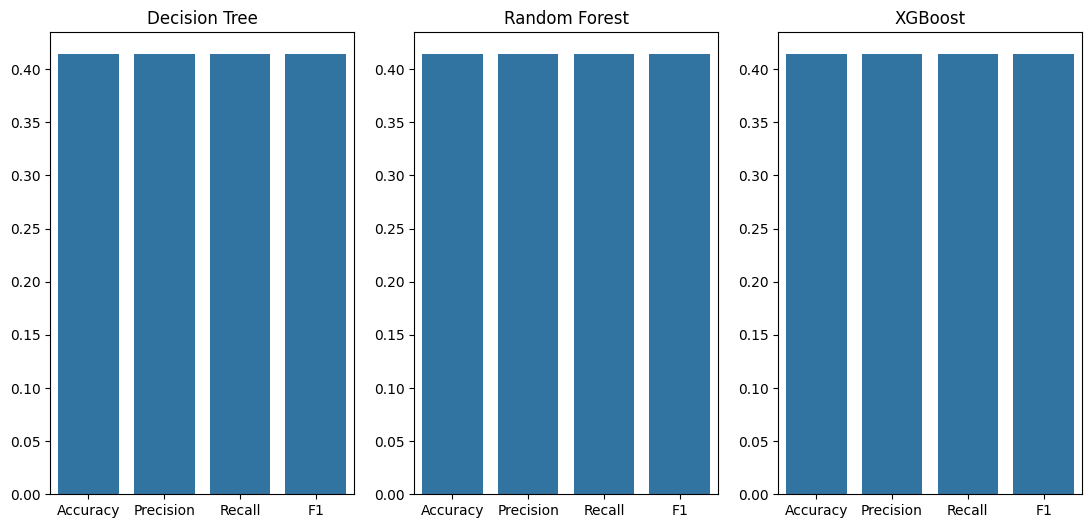

In [51]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(18, 6))
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Decision Tree')
plt.subplot(1, 4, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')
plt.subplot(1, 4, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('XGBoost')
# plt.tight_layout()
plt.show()